In [40]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [5]:
Forest_data=pd.read_csv("forestfires.csv")
Forest_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [6]:
Forest_data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [8]:
forest_data=Forest_data.drop(['month','day'],axis=1)
forest_data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [47]:
forest_data['size_category'].value_counts()

1    378
0    139
Name: size_category, dtype: int64

In [48]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [49]:
forest_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,0.731141
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,0.443796
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
import warnings
warnings.filterwarnings("ignore")

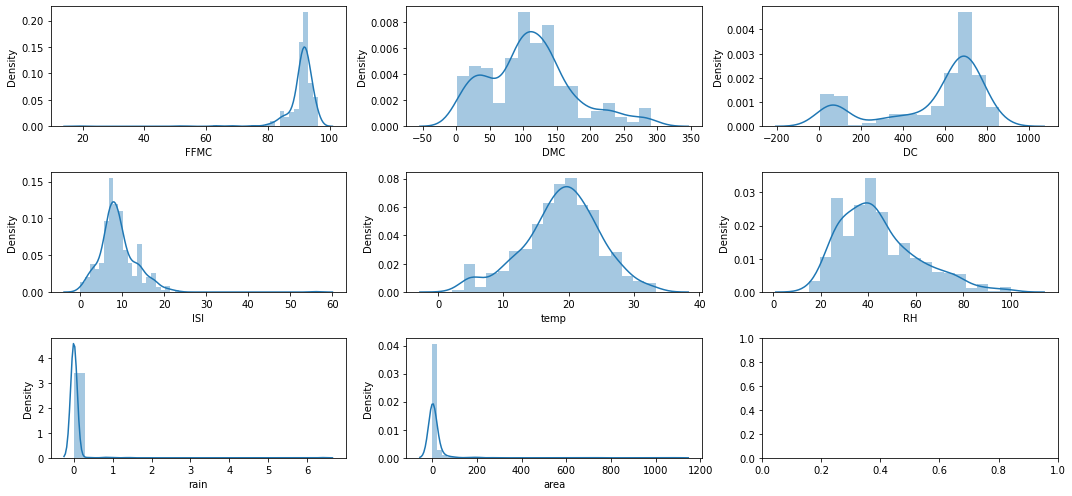

In [46]:
fig, ax = plt.subplots(3, 3, figsize=(15,7))
sns.distplot(forest_data.FFMC,ax=ax[0,0])
sns.distplot(forest_data.DMC,ax=ax[0,1])
sns.distplot(forest_data.DC,ax=ax[0,2])
sns.distplot(forest_data.ISI,ax=ax[1,0])
sns.distplot(forest_data.temp,ax=ax[1,1])
sns.distplot(forest_data.RH,ax=ax[1,2])
sns.distplot(forest_data.rain,ax=ax[2,0])
sns.distplot(forest_data.area,ax=ax[2,1])
plt.tight_layout()
plt.show()

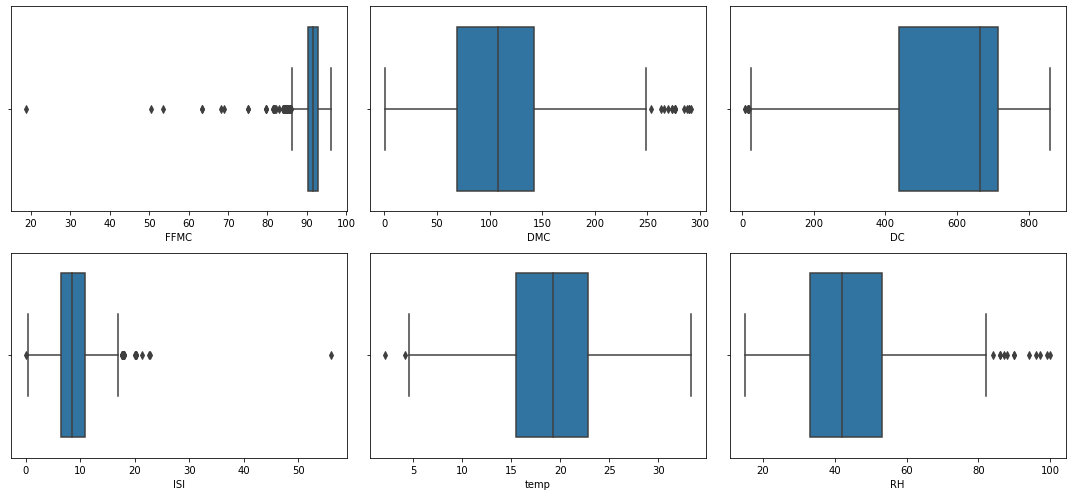

In [51]:
fig, ax = plt.subplots(2, 3, figsize=(15,7))
sns.boxplot(forest_data.FFMC,ax=ax[0,0])
sns.boxplot(forest_data.DMC,ax=ax[0,1])
sns.boxplot(forest_data.DC,ax=ax[0,2])
sns.boxplot(forest_data.ISI,ax=ax[1,0])
sns.boxplot(forest_data.temp,ax=ax[1,1])
sns.boxplot(forest_data.RH,ax=ax[1,2])
plt.tight_layout()
plt.show()

In [15]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
forest_data['size_category']= label_encoder.fit_transform(forest_data['size_category'])

In [28]:
x=forest_data.iloc[:,0:-1]
y=forest_data.iloc[:,-1]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3,random_state=20)

In [30]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((361, 28), (361,), (156, 28), (156,))

In [31]:
clf = SVC(kernel="rbf",gamma=0.0001)

clf.fit(X_train , y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred) * 100

print("Accuracy =", acc)

confusion_matrix(y_test, y_pred)

Accuracy = 82.05128205128204


array([[ 16,  28],
       [  0, 112]], dtype=int64)

# Grid Search CV

In [33]:
clf1 = SVC()
param_grid = [{'kernel':["rbf"],'gamma':[50,5,10,0.5,1,0.001,0.0001,0.00001],'C':[1,15,14,13,12,11,10,0.1] }]
gsv = GridSearchCV(clf1,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 15, 14, 13, 12, 11, 10, 0.1],
                          'gamma': [50, 5, 10, 0.5, 1, 0.001, 0.0001, 1e-05],
                          'kernel': ['rbf']}])

In [35]:
gsv.best_params_ , gsv.best_score_ 

({'C': 13, 'gamma': 0.0001, 'kernel': 'rbf'}, 0.9084834834834835)

In [37]:
clf2= SVC(C= 13, gamma = 0.0001,kernel="rbf")
clf2.fit(X_train , y_train)
y_pred = clf2.predict(X_test)
acc1 = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc1)
confusion_matrix(y_test, y_pred)

Accuracy = 92.94871794871796


array([[ 33,  11],
       [  0, 112]], dtype=int64)